# CKD 환자에서 CLI/PAD 유무에 따른 변수 분석

## Table of Contents

* [데이터전처리](#데이터-전처리)
    : 딱히 보실 필요 없는 부분입니다
* [분석1 : CLI 에 따른 demographic data](#분석-1)
    * [데이터 탐색](#Demographic-data-살펴보기)
    * [데이터 검정](#Demographic-data-검정)
    * [검정결과](#Demographic-Data-검정-결과)
* [Logistic regression](#[부가내용]-심심해서-해보는-logistic-regression)
    * [변수간 상관관계](#변수들의 상관관계)
    * [모델적합](#모델-적합)
    * [회귀결론](#결론)

### Study group의 구분
Column G 는 CKD without CLI 인 환자 및 CKD with CLI 환자를 구분한 Group 입니다.
- Group 3: CKD 3 without CLI
- Group 4: CKD 4 without CLI
- Group 5: CKD 5 without CLI 
- Group 6: CKD 3 with CLI
- Group 7: CKD 4 with CLI
- Group 8: CKD 5 with CLI 

#### 1) 분석 1 

CLI 유무에 따른 demographic data (Gender, Age, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, BMI, Statin 복용) 의 차이를 보는 것이 분석 1 입니다.  

즉 [Group 3+4+5]와 [Group 6+7+8] 의 상기 변수의 차이를 통계적으로 분석하는 것이 필요합니다. 


---

# 데이터 전처리

데이터를 불러와서 사용가능한 형태로 수정 후 확인
    
    볼 필요가 있는 부분은 아닙니다. 

In [84]:
# 데이터 불러오기
library(xlsx)
data <- read.xlsx("../EPCinCKD_201802.xlsx", sheetIndex = 1)
# 필요한 데이터만 추출(이름, ID 제거, 150행까지)
data <- data[1:150,-c(1,2)]
data <- data[complete.cases(data),]

In [85]:
# Column name 변경
colnames(data)[c(7, 13, 15, 16, 22)] <- c("HTN", "statin", "obesity", "PAD", "CD34.All")

head(data)
tail(data)
colnames(data)

Gender,Age,Birth.Date,CKD.class,Group,DM,HTN,ACS,CHF,CVA,⋯,obesity,PAD,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
0,49.00000,1961-10-12,3,3,0,1,0,0,0,⋯,0,0,3.789457,1.450,0.1900,2.1000,1.6400,2.2900,31.432,1933.688
0,64.63611,1946-11-05,3,3,0,1,0,0,1,⋯,0,0,4.392872,6.674,0.1645,-0.0390,6.8385,0.1255,2.563,2139.464
0,38.88056,1972-03-02,3,3,0,0,0,0,0,⋯,0,0,3.704475,7.654,0.1715,0.4345,7.8255,0.6060,54.338,3092.584
1,61.50000,1949-12-08,3,3,1,1,0,0,0,⋯,1,0,6.167245,12.907,0.1740,0.2595,13.0810,0.4335,38.010,1877.869
1,69.29722,1942-05-07,3,3,0,1,0,0,0,⋯,1,0,5.879595,2.887,0.4690,-0.0955,3.3560,0.3735,81.725,1902.396
1,74.65000,1936-11-29,3,3,0,1,0,0,0,⋯,0,0,3.929069,5.296,0.1880,0.1035,5.4840,0.2915,195.327,2223.454


,Gender,Age,Birth.Date,CKD.class,Group,DM,HTN,ACS,CHF,CVA,⋯,obesity,PAD,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
144,1,63,1947-01-13,5,8,1,0,0,1,0,⋯,0,1,5.034,0.3595,0.2075,0.0470,0.5670,0.2545,127.070,3792.843
145,0,56,1954-07-15,5,8,1,1,1,0,0,⋯,0,1,3.044,0.3865,0.0875,0.0035,0.4740,0.0910,231.768,4313.722
146,1,63,1947-06-15,5,8,1,0,0,0,0,⋯,1,1,5.090,4.1670,0.2255,-0.0055,4.3925,0.2200,495.291,5311.477
147,0,71,1938-11-08,5,8,1,1,0,0,0,⋯,1,1,5.690,1.2190,0.1255,0.1955,1.3445,0.3210,62.777,3311.798
148,0,70,1940-01-20,5,8,1,1,1,0,1,⋯,1,1,5.554,1.7870,0.0795,-0.0045,1.8665,0.0750,277.927,7015.030
149,1,71,1940-10-08,5,8,1,1,0,0,0,⋯,0,1,3.684,2.1200,2.6090,10.3900,4.7290,12.9990,500.290,3461.473


[1] "Gender"      "Age"         "Birth.Date"  "CKD.class"   "Group"      
 [6] "DM"          "HTN"         "ACS"         "CHF"         "CVA"        
[11] "smoking"     "alcohol"     "statin"      "BMI"         "obesity"    
[16] "PAD"         "Average.CFU" "VEGF"        "CD34.VEGF"   "CD34"       
[21] "VEGF.All"    "CD34.All"    "VEGF.1"      "SDF.1"

- 잘 불려온 것을 확인할 수 있다. 

In [86]:
# 범주형 변수, 데이터 타입 변경
# data$Gender <- factor(data$Gender, levels=c(0,1), labels =c("F","M"))

# for( key in c('DM', 'HTN', 'ACS', 'CHF', 'CVA', 'smoking', 'alcohol', 'statin', 'obesity', 'PAD') ){
#     data[key][,1] <- factor(data[key][,1])
# }

다음 코드는 

CLI 그룹에 따라 3,4,5 는 0 / 6,7,8 은 1 로 하는 CLI 변수 생성

In [87]:
library(dplyr)

# CLI 변수 생성 : 0 = CLI 없음(Group3,4,5) / 1 = CLI 있음(Group6,7,8)
data <- data %>% mutate( CLI = as.numeric(Group>=5))

---

# 분석 1

### CLI 집단과 비 CLI 집단 사이의 demographic 수치 비교

범주형 : Gender, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, obesity(BMI 기준 비만여부), Statin
    
    => Chi-square 분석

연속형 : Age, BMI

    => t-test or Wilcoxon-test


## Demographic data 살펴보기

CLI 유무를 기준으로 나눈 집단에서 

Gender, Age, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, BMI, Statin 데이터를 확인합니다. 

#### Mean과 Ratio 확인

CLI/비CLI 집단에서 각 변수의 비율과 평균을 확인합니다. 

아래 코드 신경쓰실 필요 없고, 결과만 보시면 됩니다. 


CLI(group6+7+8) number :  59 /  133 


<CLI 그룹에 따른 Demographic data 비교>


CLI,gender.ratio,mean.Age,DM.ratio,HTN.ratio,ACS.ratio,CHF.ratio,CVA.ratio,smoking.ratio,alcohol.ratio,statin.ratio,mean.BMI,obesity.ratio,PAD.ratio
0,0.54,64.49,0.39,0.93,0.11,0.01,0.14,0.43,0.31,0.61,24.28,0.41,0.27
1,0.61,63.08,0.68,0.80,0.24,0.07,0.10,0.36,0.08,0.24,23.19,0.36,0.64




<CLI 그룹에 따른 Demographic data 시각화>


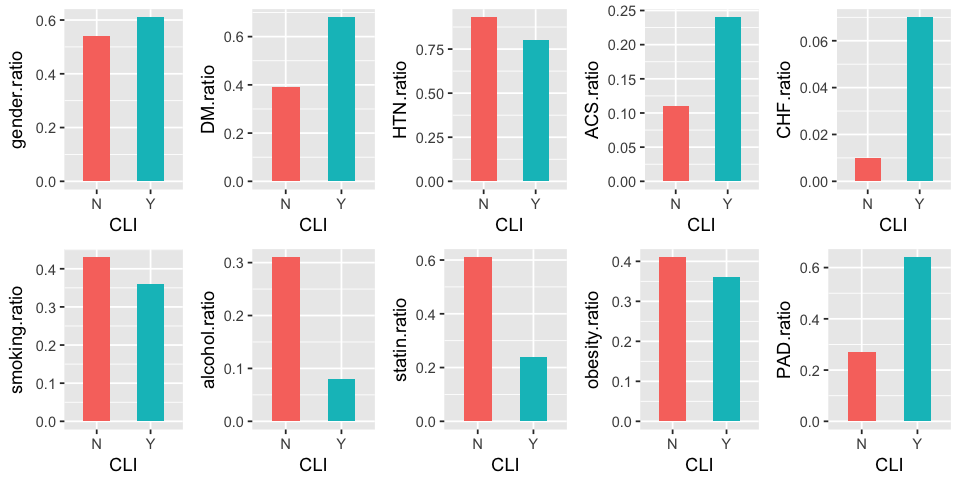

In [88]:
# CLI 데이터 수 
cat( "\nCLI(group6+7+8) number : ", sum(data$CLI), "/ ", length(data$CLI),"\n")

library(dplyr)
library(ggplot2)

# Demographic data
cat("\n\n<CLI 그룹에 따른 Demographic data 비교>\n")
demo.data <- data %>% 
    group_by( CLI ) %>%
    summarise( gender.ratio = mean(Gender, na.rm = T),
            mean.Age = mean(Age, na.rm = T),
            DM.ratio = mean(DM, na.rm = T),
            HTN.ratio = mean(HTN, na.rm = T),
            ACS.ratio = mean(ACS, na.rm = T),
            CHF.ratio = mean(CHF, na.rm = T),
            CVA.ratio = mean(CVA, na.rm = T),
            smoking.ratio = mean(smoking, na.rm = T),
            alcohol.ratio = mean(alcohol, na.rm = T),
            statin.ratio = mean(statin, na.rm = T),
            mean.BMI = mean(BMI, na.rm = T),
            obesity.ratio = mean(obesity, na.rm = T),
            PAD.ratio = mean(PAD, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))

demo.data

library(gridExtra)
library(repr)
plots <- list()  # new empty list

for (key in c("gender.ratio", "DM.ratio", "HTN.ratio", "ACS.ratio","CHF.ratio","smoking.ratio","alcohol.ratio","statin.ratio", "obesity.ratio", "PAD.ratio")) {
    p1 <- demo.data %>% mutate(CLI = as.factor(CLI)) %>% 
        ggplot(aes_string(x="CLI", y=key, fill="CLI")) +
        geom_bar(stat="identity", width=0.5) +
        scale_x_discrete("CLI", breaks= c(0,1), labels = c("N","Y"))+ 
        guides(fill=FALSE)
    plots[[key]] <- p1  # add each plot into plot list
}

options(repr.plot.width=8, repr.plot.height=4)
cat("\n\n<CLI 그룹에 따른 Demographic data 시각화>\n")
grid.arrange(grobs=plots, ncol=5)

비율 차이

- 1.5배~2배 정도: DM, ACS, CVA, smoking, PAD
- 2배 이상:  CHF, alcohol, statin 


#### Age 와 BMI 의 분포 확인 

Age 와 BMI 는 연속형 자료이므로, t-test를 실시하기 전에 정규성을 확인해주는 것이 좋습니다. 

우선 분포를 살펴봅니다. 



<Age, BMI 분포 그래프>

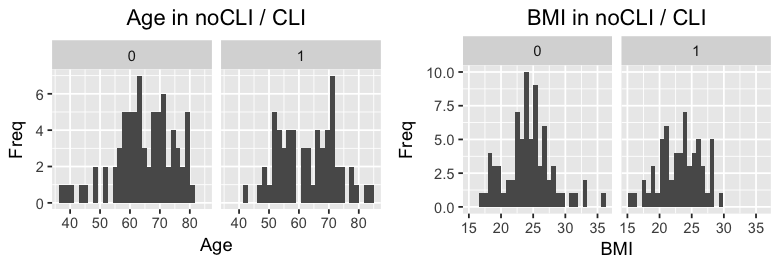

In [89]:
# 연속형 데이터 분포 확인
library(repr)
library(ggplot2)
library(gridExtra)

# CLI 집단에 따른 Age 분포 확인 
p1 <- data %>% 
    ggplot(aes(x=Age)) +
    geom_histogram(bins=30, na.rm = T) +  
    ggtitle("Age in noCLI / CLI") +
    labs(x="Age", y="Freq") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    facet_wrap(~ CLI)

# 겹친 그래프
# data %>% 
#     mutate(CLI.f = as.factor(CLI)) %>%
#     ggplot(aes(x=Age, fill = CLI.f)) +
#     geom_histogram(alpha=0.5, position="identity", binwidth = 2.5) +  
#     ggtitle("Age in noCLI / CLI") +
#     labs(x="Age", y="Freq") +
#     theme(plot.title = element_text(hjust = 0.5))

# CLI 집단에 따른 BMI 분포 확인
p2 <- data %>% 
    ggplot(aes(x=BMI)) +
    geom_histogram(bins=30, na.rm = T) +  
    ggtitle("BMI in noCLI / CLI") +
    labs(x="BMI", y="Freq") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    facet_wrap(~ CLI)

# 겹친 그래프
# data %>% 
#     mutate(CLI.f = as.factor(CLI)) %>%
#     ggplot(aes(x=BMI, fill = CLI.f)) +
#     geom_histogram(alpha=0.5, position="identity",binwidth = 1) +  
#     ggtitle("BMI in noCLI / CLI") +
#     labs(x="BMI", y="Freq") +
#     theme(plot.title = element_text(hjust = 0.5))

cat("\n\n<Age, BMI 분포 그래프>")
options(repr.plot.width=6.5, repr.plot.height=2.2)
grid.arrange(p1, p2, ncol=2)

CLI 그룹과 비 CLI 그룹에서 분포의 큰 차이는 없어보입니다.  
정규성을 따르는지 조금 더 확실하게 따져 봅시다. 

#### Age 정규성


 <Age 정규성 검정>


CLI,Age정규성_p.value
0,0.01648365
1,0.24455698


  등분산성 검정 p-value :  0.8273464

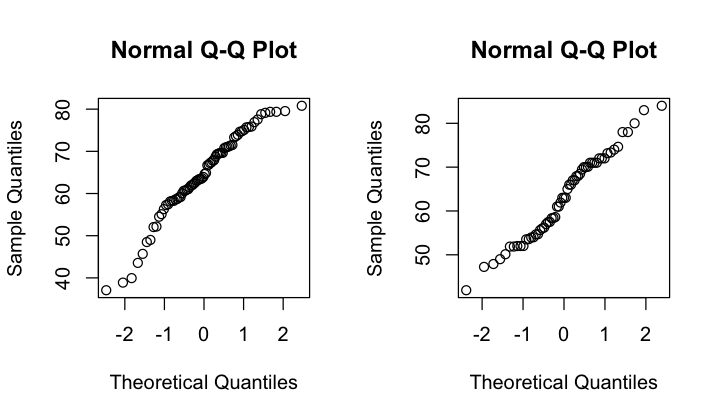

In [90]:
options(repr.plot.width=6, repr.plot.height=3.5)
par(mfrow = c(1, 2))
p1 <- data %>% filter(CLI==0) %>% with(qqnorm(Age))
p2 <- data %>% filter(CLI==1) %>% with(qqnorm(Age))

result <- data %>% group_by(CLI)%>% summarise(Age정규성_p.value = shapiro.test(Age)$p.value)
var.anal <- var.test(data$Age ~ data$CLI)

cat("\n <Age 정규성 검정>\n")
result
cat("  등분산성 검정 p-value : ", var.anal$p.value)

정규성이 살짝 어긋난다. => wilcoxon 사용

#### BMI 정규성


 <BMI 정규성 검정>


CLI,BMI정규성_p.value
0,0.05050775
1,0.62791932


  등분산성 검정 p-value :  0.2972525

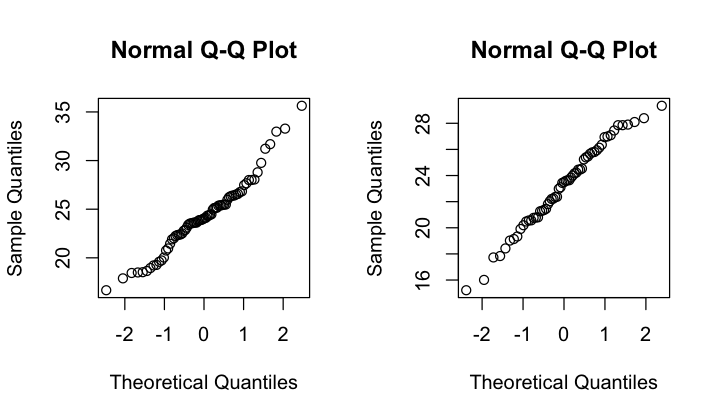

In [91]:
options(repr.plot.width=6, repr.plot.height=3.5)
par(mfrow = c(1, 2))
p1 <- data %>% filter(CLI==0) %>% with(qqnorm(BMI))
p2 <- data %>% filter(CLI==1) %>% with(qqnorm(BMI))

result <- data %>% group_by(CLI)%>% summarise(BMI정규성_p.value = shapiro.test(BMI)$p.value)
var.anal <- var.test(data$BMI ~ data$CLI)

cat("\n <BMI 정규성 검정>\n")
result
cat("  등분산성 검정 p-value : ", var.anal$p.value)

정규성도 만족, 등분산성도 만족한다. => t-test 사용

## Demographic data 검정

### BMI, Age 차이 검정

그렇다면 CLI/ non-CLI 집단에서 BMI 차이가 있는지 test를 실시해보자 

In [92]:
Age.result <- wilcox.test(Age~CLI, data = data)
#BMI.result <- wilcox.test(BMI~CLI, data = data)
#Age.result <- t.test(Age~CLI, data = data) # 어차피 유의하지 않긴 함
BMI.result <- t.test(BMI~CLI, data = data)

cat("\nAge에 대한 Wilcoxon-test 결과 : p-value =", Age.result$p.value)
cat("\nBMI에 대한 t-test 결과 : p-value =", BMI.result$p.value)



Age에 대한 Wilcoxon-test 결과 : p-value = 0.2389715
BMI에 대한 t-test 결과 : p-value = 0.07297659

### 범주형 데이터 검정

Gender, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, obesity(BMI 기준 비만여부), Statin 에 대한 차이 검정을 실시해보자

=> Chisq 검정

In [93]:
# Chisq test for tabular data

for(key in c("DM", "HTN", "ACS", "CHF", "CVA", "smoking", "alcohol", "statin", "obesity", "PAD")){
    test <- chisq.test(data[key][,1], data["CLI"][,1])
    cat("\n", key, "result : p-value =", round(test$p.value, 4), '\n')
}


 DM result : p-value = 0.0019 

 HTN result : p-value = 0.0385 

 ACS result : p-value = 0.0789 


Warning message in chisq.test(data[key][, 1], data["CLI"][, 1]):
“Chi-squared approximation may be incorrect”


 CHF result : p-value = 0.2395 

 CVA result : p-value = 0.7484 

 smoking result : p-value = 0.4734 

 alcohol result : p-value = 0.003 

 statin result : p-value = 0 

 obesity result : p-value = 0.6866 

 PAD result : p-value = 0 


유의미한 결과
- DM 0.003
- HTN 0.04
- alcohol 0.001
- statin 0.000
- PAD 0.000

그런데 CHF 와 alcohol 은 표본 수가 적어, 경고가 떴으므로 
Fisher's exact test 를 하는 것이 좋겠다. 

In [94]:
chf.result <- fisher.test(data$CHF, data$CLI)
alcohol.result <- fisher.test(data$alcohol, data$CLI)

cat("\nFisher's Exact Test\n",
    "\n  CHF : p-value =", chf.result$p.value,
    "\n  Alcohol : p-value =", alcohol.result$p.value
   )


Fisher's Exact Test
 
  CHF : p-value = 0.1704857 
  Alcohol : p-value = 0.001369928

앞의 결과와 달라지는 것은 없다. 

## Demographic Data 검정 결과

Gender, Age, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, BMI, Statin 복용 중 

두 집단에서 차이가 나는 사항들은 
- **DM** - 0.42 vs 0.69 - *p : 0.003*
- **HTN** - 0.94 vs 0.81 - *p : 0.04*
- **alcohol** - 0.32 vs 0.08 - *p : 0.001*
- **statin** - 0.60 vs 0.22 - *p : 0.000*
- **PAD** - 0.27 vs 0.66 - *p : 0.000*

이다. 

다중분석을 고려하더라도, DM, alcohol, statin, PAD 는 거의 확실하게 차이가 나는 것으로 생각된다. 

# [부가내용] 심심해서 해보는 logistic regression

### 변수들의 상관관계


<상관관계 표와 Heat map>


,DM,HTN,ACS,CHF,CVA,smoking,alcohol,statin,obesity,PAD
DM,1,-0.01,0.23,0.03,0.08,0.08,0.02,-0.14,0.08,0.48
HTN,NA,1.00,0.05,-0.16,0.00,0.08,0.09,0.12,0.16,-0.07
ACS,NA,NA,1.00,0.02,0.08,0.05,-0.08,-0.03,-0.02,0.26
CHF,NA,NA,NA,1.00,0.17,0.00,-0.10,-0.02,0.01,0.07
CVA,NA,NA,NA,NA,1.00,0.03,-0.08,-0.05,0.14,0.09
smoking,NA,NA,NA,NA,NA,1.00,0.41,-0.02,0.12,0.09
alcohol,NA,NA,NA,NA,NA,NA,1.00,0.06,0.05,-0.01
statin,NA,NA,NA,NA,NA,NA,NA,1.00,0.14,-0.27
obesity,NA,NA,NA,NA,NA,NA,NA,NA,1.00,0.12
PAD,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.00


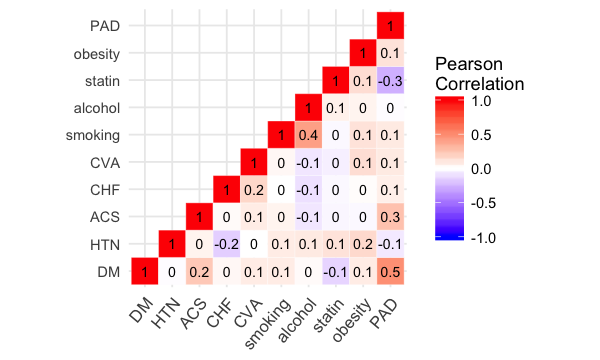

In [95]:
# 상관 계수를 살펴보자 

library(reshape2)

cormat <- round(cor(data[c(6:13,15,16)], use = 'complete.obs'),2)
cormat[lower.tri(cormat)]<- NA

cat("\n<상관관계 표와 Heat map>\n")
cormat
melted_cormat <- melt(cormat, na.rm = TRUE)

options(repr.plot.width=5, repr.plot.height=3)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 50, vjust = 1, 
                                     size = 10, hjust = 1) , 
          axis.title.x=element_blank(), 
          axis.title.y=element_blank())+
    coord_fixed() + geom_text(aes(Var2, Var1, label = round(value,1)), color = "black", size = 3)

관련성이 있어보이는 변수들은 다음과 같다. 
- PAD와 DM : 0.47
- smoking 과 alcohol : 0.42
- statin과 PAD : -0.29
- ACS와 PAD : 0.24
- ACS와 DM : 0.21


### 모델 적합

우선 앞에서 차이가 있는 것으로 보였던 

**DM, HTN, alcohol, statin, PAD**를 모두 넣고 적합해보자 

In [96]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + PAD, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + PAD, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8841  -0.7883  -0.3289   0.6095   2.7063  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.8823     0.6916   1.276  0.20209   
DM            0.7458     0.4653   1.603  0.10896   
HTN          -1.2668     0.6782  -1.868  0.06178 . 
alcohol      -1.8530     0.6012  -3.082  0.00205 **
statin       -1.3985     0.4361  -3.207  0.00134 **
PAD           1.2280     0.4771   2.574  0.01006 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 182.68  on 132  degrees of freedom
Residual deviance: 133.70  on 127  degrees of freedom
AIC: 145.7

Number of Fisher Scoring iterations: 4


DM 과 PAD 의 공선성으로 인해서 DM이 유의하지 않게 나온 것 같다. 

PAD 나 DM 을 제거하고 모델을 적합해야할 것으로 보인다. 

PAD는 사실 Demographic data 에서 고려하려던 변수가 아니었으므로, 
이를 제외하고 모형을 적합해보자. 

#### PAD 제거 모델 

In [97]:
model <- glm(CLI ~ DM + HTN + alcohol + statin, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6956  -0.9619  -0.4863   0.7364   2.5894  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.1380     0.6592   1.726 0.084277 .  
DM            1.2416     0.4189   2.964 0.003035 ** 
HTN          -1.2131     0.6524  -1.859 0.062960 .  
alcohol      -1.6970     0.5735  -2.959 0.003087 ** 
statin       -1.5449     0.4248  -3.637 0.000276 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 182.68  on 132  degrees of freedom
Residual deviance: 140.46  on 128  degrees of freedom
AIC: 150.46

Number of Fisher Scoring iterations: 4


모든 변수가 유의미한 크기의 p-value 를 가진다. 

HTN 의 경우 경계수준 정도의 p-value 이며, 이를 넣을지는 anova 를 통해서 판단해보자. 

In [98]:
model1 <- glm(CLI ~ DM + alcohol + statin , family = binomial(),data = data)
model2 <- glm(CLI ~ DM + alcohol + statin + HTN , family = binomial(),data = data)
summary(model1)
anova(model2)
library(lmtest)
lrtest(model1, model2)


Call:
glm(formula = CLI ~ DM + alcohol + statin, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7592  -1.0058  -0.5073   0.6917   2.5375  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.1149     0.3486   0.329 0.741790    
DM            1.1933     0.4102   2.909 0.003624 ** 
alcohol      -1.7261     0.5701  -3.028 0.002462 ** 
statin       -1.5674     0.4171  -3.758 0.000172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 182.68  on 132  degrees of freedom
Residual deviance: 144.17  on 129  degrees of freedom
AIC: 152.17

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,132,182.6818
DM,1,10.939903,131,171.7419
alcohol,1,12.307265,130,159.4346
statin,1,15.266819,129,144.1678
HTN,1,3.709042,128,140.4588


#Df,LogLik,Df,Chisq,Pr(>Chisq)
4,-72.08391,NA,NA,NA
5,-70.22939,1,3.709042,0.05411843


HTN을 안넣어도 상관은 없겠다. 

DM + alcohol + statin 가 CLI 가 있을지 없을지를 구분짓는 데에 꽤 유용하게 쓰일 수 있겠다. 

실제로 모든 모형을 고려하는 과정을 거쳐보면 다음과 같다. 

In [99]:
library(leaps)
df <- data[,c(1,2,6:15, 25)]
df <- df[complete.cases(df),]
head(df)
full.model <- glm(CLI~., family = binomial(), data = df)
fit.model <- glm(CLI~ DM + alcohol + statin +HTN , family = binomial(), data = df)
lrtest(fit.model, full.model)

Gender,Age,DM,HTN,ACS,CHF,CVA,smoking,alcohol,statin,BMI,obesity,CLI
0,49.00000,0,1,0,0,0,0,0,0,18.94728,0,0
0,64.63611,0,1,0,0,1,0,0,1,20.96436,0,0
0,38.88056,0,0,0,0,0,0,0,0,18.52237,0,0
1,61.50000,1,1,0,0,0,1,1,1,26.83623,1,0
1,69.29722,0,1,0,0,0,1,0,1,26.39798,1,0
1,74.65000,0,1,0,0,0,0,1,0,18.64534,0,0


#Df,LogLik,Df,Chisq,Pr(>Chisq)
5,-70.22939,NA,NA,NA
13,-63.99624,8,12.4663,0.1315796


In [100]:
b <- regsubsets(CLI ~. , data=df, nvmax = 20)
summary(b)

Subset selection object
Call: regsubsets.formula(CLI ~ ., data = df, nvmax = 20)
12 Variables  (and intercept)
        Forced in Forced out
Gender      FALSE      FALSE
Age         FALSE      FALSE
DM          FALSE      FALSE
HTN         FALSE      FALSE
ACS         FALSE      FALSE
CHF         FALSE      FALSE
CVA         FALSE      FALSE
smoking     FALSE      FALSE
alcohol     FALSE      FALSE
statin      FALSE      FALSE
BMI         FALSE      FALSE
obesity     FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          Gender Age DM  HTN ACS CHF CVA smoking alcohol statin BMI obesity
1  ( 1 )  " "    " " " " " " " " " " " " " "     " "     "*"    " " " "    
2  ( 1 )  " "    " " " " " " " " " " " " " "     "*"     "*"    " " " "    
3  ( 1 )  " "    " " "*" " " " " " " " " " "     "*"     "*"    " " " "    
4  ( 1 )  " "    " " "*" "*" " " " " " " " "     "*"     "*"    " " " "    
5  ( 1 )  " "    "*" "*" "*" " " " " " " " "     "*"     "*"    " " 

In [101]:
library(MASS)

In [102]:
df <- data[,c(1,2,6:15, 25)]
df2 <- df[complete.cases(df),]
df3 <- df2[c(1:4,9:10,13)]
model <- glm(CLI~1, data = df2)
stepAIC(model, scope = list(upper = ~., lower = ~1), steps = 100, direction = "forward")

Start:  AIC=195.36
CLI ~ 1




Call:  glm(formula = CLI ~ 1, data = df2)

Coefficients:
(Intercept)  
     0.4436  

Degrees of Freedom: 132 Total (i.e. Null);  132 Residual
Null Deviance:	    32.83 
Residual Deviance: 32.83 	AIC: 195.4

In [106]:
model3 <- glm(CLI ~ DM * alcohol + statin , family = binomial(),data = data)
model4 <- glm(CLI ~ DM + alcohol + statin , family = binomial(),data = data)
lrtest(model4, model3)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
4,-72.08391,NA,NA,NA
5,-70.67990,1,2.808037,0.0937931


### 결론

로지스틱 회귀 상에서 
AIC 와 변수별 유의성을 고려하였을때, 
- DM 
- alcohol 
- statin 
- HTN (경계 수준) 

정도가 모델의 변수로서 적절할 것으로 생각된다. 

PAD를 설명변수로 본다면, DM 대신 PAD 를 넣는 것이 적절한 것으로 보인다. 

## 부록 - 참고가능한 자료

In [104]:
# 각종 model 에 대한 AIC 계산 
md <- glm(CLI ~ DM, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ HTN, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ ACS, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ CHF , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ CVA, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ smoking , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ obesity, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ PAD , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")

cat("\n\n")

md <- glm(CLI ~ alcohol + DM, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + HTN, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + ACS, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + CHF , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + CVA, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + smoking , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + obesity, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + PAD , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")

cat("\n\n")

md <- glm(CLI ~ alcohol + statin + DM, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + HTN, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + ACS, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + CHF , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + CVA, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + smoking , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + obesity, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + PAD , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")

cat("\n\n")

md <- glm(CLI ~ alcohol + statin + DM + HTN, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + ACS, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + CHF , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + CVA, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + smoking , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + obesity, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + PAD , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")

cat("\n\n")

md <- glm(CLI ~ alcohol + statin + DM + HTN + ACS, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + CHF , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + CVA, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + smoking , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + obesity, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + PAD , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")

cat("\n\n")

md <- glm(CLI ~ alcohol + statin + DM + HTN + CVA + ACS, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + CVA + CHF , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + CVA + smoking , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + CVA + obesity, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ alcohol + statin + DM + HTN + CVA + PAD , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")

DM : 175.7419 
HTN : 181.2095 
ACS : 182.7229 
CHF : 183.91 
CVA : 186.3307 
smoking : 185.8774 
alcohol : 175.7515 
statin : 167.755 
obesity : 186.3411 
PAD : 167.6685 


alcohol + DM : 165.4346 
alcohol + HTN : 173.2188 
alcohol + ACS : 174.5413 
alcohol + CHF : 175.9098 
alcohol + CVA : 177.0102 
alcohol + smoking : 177.5436 
alcohol + statin : 158.9803 
alcohol + obesity : 177.5494 
alcohol + PAD : 157.184 


alcohol + statin + DM : 152.1678 
alcohol + statin + HTN : 157.6822 
alcohol + statin + ACS : 157.8248 
alcohol + statin + CHF : 158.9786 
alcohol + statin + CVA : 159.8955 
alcohol + statin + smoking : 160.9432 
alcohol + statin + obesity : 160.9404 
alcohol + statin + PAD : 147.6409 


alcohol + statin + DM + HTN : 150.4588 
alcohol + statin + DM + ACS : 152.7662 
alcohol + statin + DM + CHF : 152.3061 
alcohol + statin + DM + CVA : 152.1975 
alcohol + statin + DM + smoking : 154.1673 
alcohol + statin + DM + obesity : 154.1623 
alcohol + statin + DM + PAD : 147.3807 


alc


비슷한 결과 확인 가능

In [107]:
md <- glm(CLI ~ statin + DM, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin + HTN, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin + ACS, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin + CHF , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin + CVA, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin + smoking , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin + alcohol , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin + obesity, family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")
md <- glm(CLI ~ statin + PAD , family = binomial(),data = data)
cat(as.character(md$formula)[3],":", AIC(md), "\n")

statin + DM : 161.2209 
statin + HTN : 165.8278 
statin + ACS : 165.7427 
statin + CHF : 166.8164 
statin + CVA : 169.002 
statin + smoking : 168.6758 
statin + alcohol : 158.9803 
statin + obesity : 169.755 
statin + PAD : 157.4737 



<상관관계 표와 Heat map>


,DM,HTN,ACS,CHF,CVA,smoking,alcohol,statin,obesity,PAD,Average.CFU,VEGF,VEGF.All,CD34.VEGF,CD34,CD34.All,VEGF.1,SDF.1,CLI
DM,1,-0.01,0.23,0.03,0.08,0.08,0.02,-0.14,0.08,0.48,0.07,-0.13,-0.13,-0.04,0.12,0.09,0.25,0.21,0.28
HTN,NA,1.00,0.05,-0.16,0.00,0.08,0.09,0.12,0.16,-0.07,0.26,0.11,0.11,-0.02,0.01,0.00,-0.14,-0.32,-0.20
ACS,NA,NA,1.00,0.02,0.08,0.05,-0.08,-0.03,-0.02,0.26,-0.01,-0.10,-0.10,-0.09,-0.07,-0.08,0.13,0.21,0.17
CHF,NA,NA,NA,1.00,0.17,0.00,-0.10,-0.02,0.01,0.07,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.02,0.02,0.14
CVA,NA,NA,NA,NA,1.00,0.03,-0.08,-0.05,0.14,0.09,0.07,-0.01,-0.01,0.10,-0.07,-0.03,0.02,0.00,-0.05
smoking,NA,NA,NA,NA,NA,1.00,0.41,-0.02,0.12,0.09,0.30,0.14,0.14,0.03,-0.10,-0.08,0.04,-0.16,-0.08
alcohol,NA,NA,NA,NA,NA,NA,1.00,0.06,0.05,-0.01,0.22,0.24,0.24,-0.01,-0.06,-0.05,-0.01,-0.21,-0.28
statin,NA,NA,NA,NA,NA,NA,NA,1.00,0.14,-0.27,0.29,0.20,0.20,-0.06,-0.11,-0.10,-0.27,-0.21,-0.37
obesity,NA,NA,NA,NA,NA,NA,NA,NA,1.00,0.12,0.79,0.11,0.10,-0.09,-0.17,-0.16,0.00,-0.16,-0.05
PAD,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.00,0.03,-0.17,-0.17,0.00,0.10,0.08,0.36,0.29,0.37


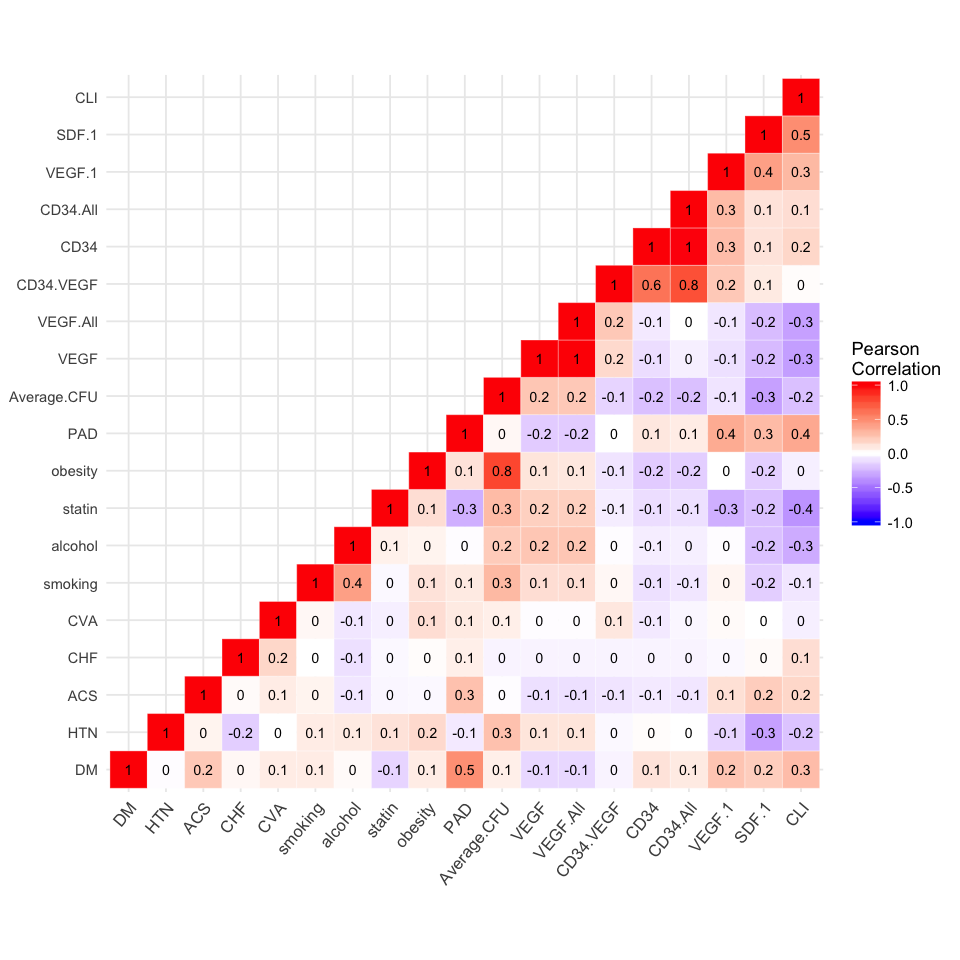

In [110]:
# 상관 계수를 살펴보자 

library(reshape2)

cormat <- round(cor(data[c(6:13,15,16, 17, 18,21, 19, 20 ,22, 23, 24,25)], use = 'complete.obs'),2)
cormat[lower.tri(cormat)]<- NA

cat("\n<상관관계 표와 Heat map>\n")
cormat
melted_cormat <- melt(cormat, na.rm = TRUE)

options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 50, vjust = 1, 
                                     size = 10, hjust = 1) , 
          axis.title.x=element_blank(), 
          axis.title.y=element_blank())+
    coord_fixed() + geom_text(aes(Var2, Var1, label = round(value,1)), color = "black", size = 3)